<a href="https://colab.research.google.com/github/ludmilaexbrayat/recognizing-packagings/blob/master/live_testing_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# General Packages

import numpy as np
import pickle
import os
import sys
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Torch Specific

import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision import models,transforms,datasets

from PIL import Image

In [0]:
COLUMNS = np.array(['Barquette',	
                    'Bocal',	
                    'Boite',
                    'Bouteille',
                    'Brique',
                    'Carton',
                    'Conserve',
                    'Metal',
                    'Papier',
                    'Plastique',
                    'Pot',
                    'Sachet',
                    'Verre'])

In [0]:
!pip install -U -q PyDrive
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_model = 'https://drive.google.com/open?id=1664MPlkLmBo__s6g8Kd3D88DQEC1tVIK'
fluff, id_model = link_model.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id_model}) 
downloaded.GetContentFile('train_model2.pt')

In [0]:
!mkdir data

In [16]:
%cd ..

/


In [0]:
#!unrar e X_sample.rar data/

In [0]:
transformer = transforms.Compose([
                # 1. Resizing the images so they all have the same format
                transforms.Resize((224,224)),
                # 2. Converting to Tensor
                transforms.ToTensor()
            ])

In [0]:
data_path = 'content/'
train_dataset = torchvision.datasets.ImageFolder(
    root=data_path,
    transform=transformer)

In [19]:
train_dataset[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]), 1)

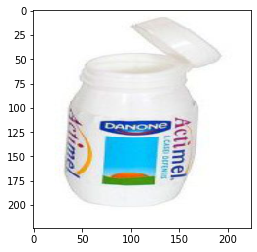

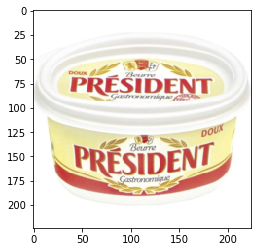

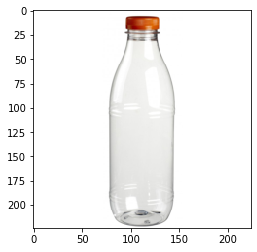

In [20]:
# Plotting an image
for index_image in range(3):
  plt.figure()
  plt.imshow(np.dstack(train_dataset[index_image][0].numpy()))
  plt.show()

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [22]:
model = torch.load('content/train_model2.pt')
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

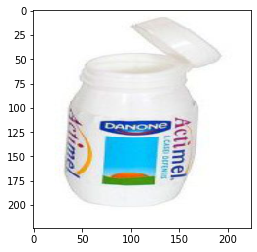


 Raw Predictions:
tensor([3.2615e-05, 1.8535e-03, 1.1062e-04, 7.1165e-01, 1.5018e-08, 1.0834e-03,
        5.7038e-08, 5.8423e-03, 1.2371e-03, 3.1827e-01, 1.8581e-02, 4.4647e-03,
        1.1040e-01], device='cuda:0', grad_fn=<SelectBackward>)

 Predicted Labels according to threshold: 
['Bouteille']


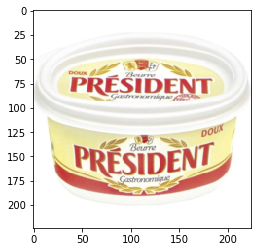


 Raw Predictions:
tensor([8.2833e-04, 5.3896e-03, 5.2815e-03, 1.2383e-04, 3.3518e-09, 1.7180e-02,
        2.1308e-03, 3.9373e-02, 1.8286e-03, 1.0395e-01, 6.7254e-02, 1.4925e-02,
        1.3881e-01], device='cuda:0', grad_fn=<SelectBackward>)

 Predicted Labels according to threshold: 
[]


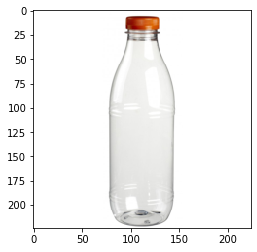


 Raw Predictions:
tensor([1.0725e-06, 1.0450e-07, 3.3849e-06, 9.9811e-01, 3.7195e-06, 2.3210e-02,
        1.6208e-08, 2.7022e-03, 7.0956e-05, 2.3058e-02, 5.0986e-06, 1.5976e-05,
        7.9050e-01], device='cuda:0', grad_fn=<SelectBackward>)

 Predicted Labels according to threshold: 
['Bouteille' 'Verre']


In [23]:
# Plot prediction for an image

for image in train_dataset:
  image_to_device = image[0].to(device)
  plt.imshow(np.dstack(image[0].numpy()))
  plt.show()
  pred = model(image_to_device.unsqueeze(0))
  print('\n Raw Predictions:')
  print(pred[0])
  print('\n Predicted Labels according to threshold: ')
  print(COLUMNS[pred[0].cpu() >= 0.5])